# Included in this notebook

1. Importing libraries and data
2. Cleaning and Reprocessing Data
3. The elbow technique
4. k-means clustering
5. Exporting Visuals

## Import Libraries and Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# Defining Path
path = r'C:\Users\seann\Downloads\Career Foundry Tasks\World Happiness Analysis'

In [4]:
# Imporing Happiness Dataset
wh_combined = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'world_happiness_updated.csv'), index_col = False)

## Cleaning, Manipulation, and Reprocessing

In [5]:
wh_combined.head()

,Unnamed: 0,Overall Rank,Country,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Perception of Corruption,Year
0,0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [6]:
# Dropping unnamed:0 column
wh_combined = wh_combined.drop(columns = ['Unnamed: 0'])

In [7]:
wh_combined.columns

Index(['Overall Rank', 'Country', 'Happiness Score', 'GDP per Capita',
       'Social Support', 'Health', 'Freedom', 'Generosity',
       'Perception of Corruption', 'Year'],
      dtype='object')

In [8]:
wh_combined_unsup = wh_combined.drop(columns = ['Country', 'Overall Rank','Year'])

## The Elbow Technique

In [9]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
score = [kmeans[i].fit(wh_combined_unsup).score(wh_combined_unsup) for i in range(len(kmeans))] 

score

C:\Users\seann\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-1294.0083629141586,
 -488.9635084831044,
 -306.96605281186584,
 -237.62152901159578,
 -194.77889626262913,
 -177.27369200436695,
 -163.04124630975676,
 -152.31591803291724,
 -144.5804596376977]

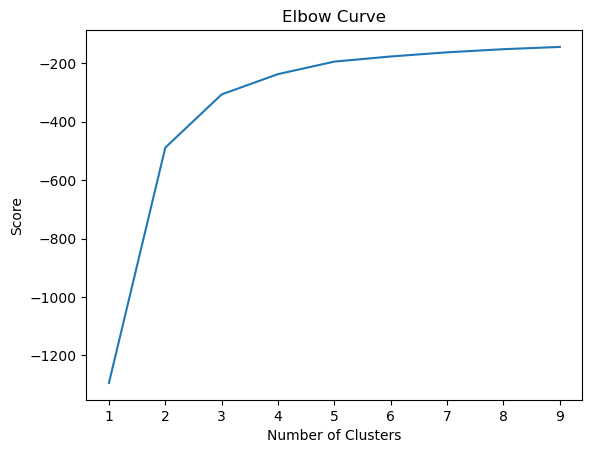

In [14]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this chart we can see that there is a large jump from two to three on the x-axis but after that the curve straightens out. This means that the best optimal count for our cluster is three.

## k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [17]:
# Fit the k-means object to the data.

kmeans.fit(wh_combined_unsup)

KMeans(n_clusters=3)

In [18]:
wh_combined_unsup['clusters'] = kmeans.fit_predict(wh_combined_unsup)

In [19]:
wh_combined_unsup.head()

,Happiness Score,GDP per Capita,Social Support,Health,Freedom,Generosity,Perception of Corruption,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,1
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1


In [20]:
wh_combined_unsup['clusters'].value_counts()

2    308
0    278
1    196
Name: clusters, dtype: int64

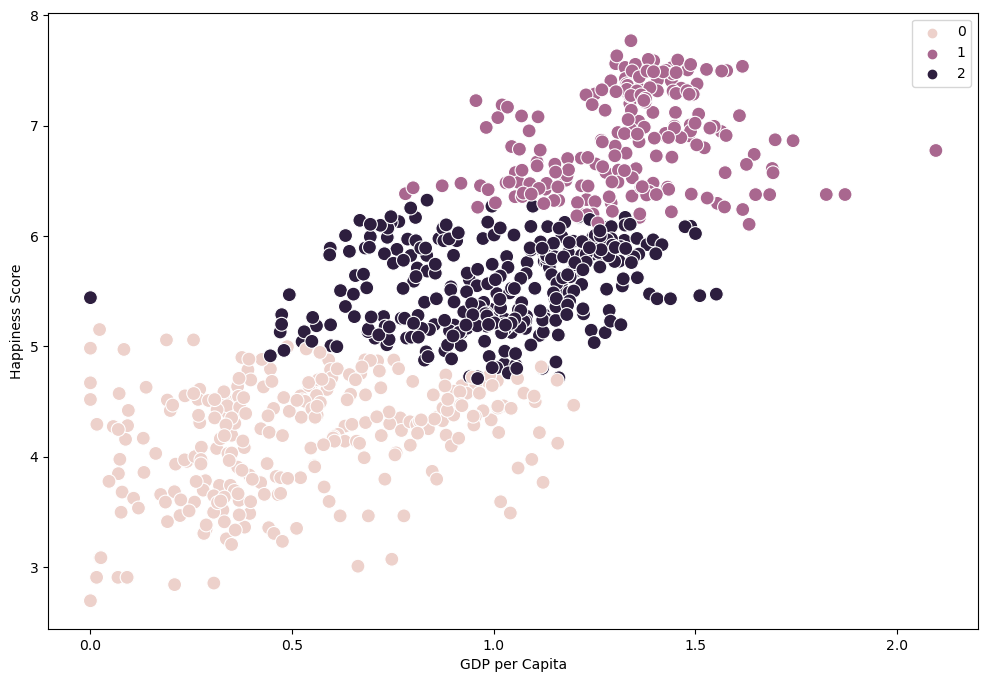

In [22]:
# Plot the clusters for the "Happiness Score" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wh_combined_unsup['GDP per Capita'], y=wh_combined_unsup['Happiness Score'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

Based on the chart above it is clear that the light pink or 0, cluster group is the group with lower GDP per capita and this group tends to have a lower happiness score. While the dark purple or cluster 2 has a medium gdp per capita score and medium happiness score, while the last group of light purple or the 1 cluster has the highest gdp per capita and the highest happiness scores. Through this graph it is clear the higher ones gdp per capita the higher their happiness level.

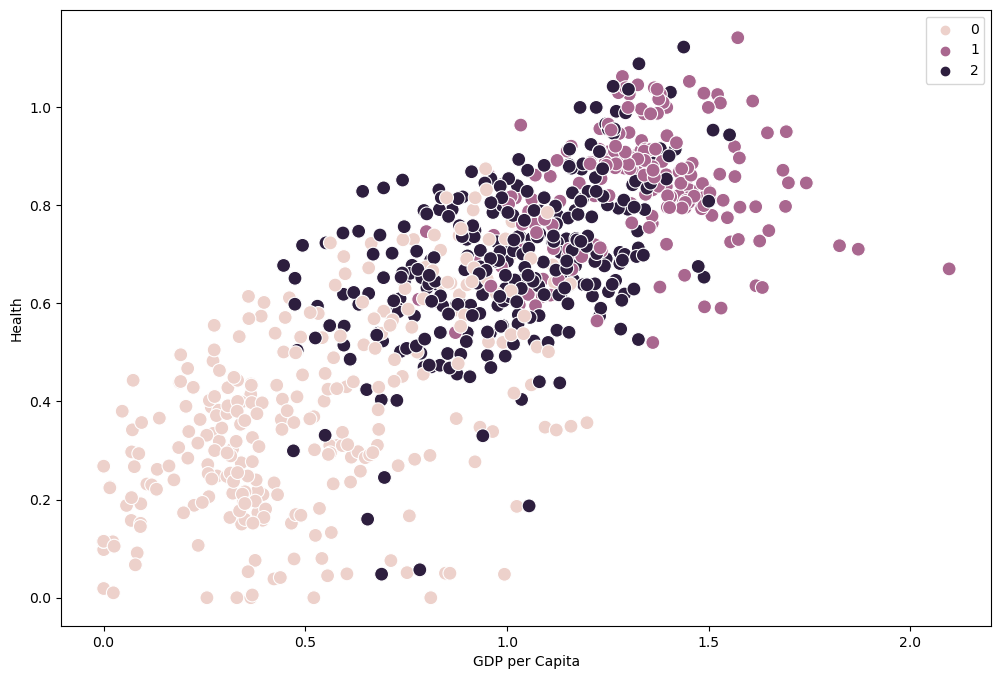

In [29]:
# Plot the clusters for the "Health" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=wh_combined_unsup['GDP per Capita'], y=wh_combined_unsup['Health'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Health') # Label y-axis.
plt.show()

Based on the chart above we can see that cluster '0' or 'light pink' overall has a lower gdp and lower to mid health/life expextancy score. The dark purple or '2' cluster has medium gdp per capita scores in comaprison to the other two clusters and has a medium  to high health/life expectancy. The last cluster is the medium purple or '1' cluster which has the hgihgest gdp per capita scores and tends to have higher health and life expectancy scores. However there seems to be a decent amount of  overlap within groups 1 and 2 points, when it comes to health/life expectancy score despite their difference in GDP per Capita. This tells us that while GDP per Capita greatly contributes to the overall health life expectancy of a country, it is not the only determining factor of a countries health/life expectancy.

In [26]:
wh_combined_unsup.loc[wh_combined_unsup['clusters'] == 2, 'cluster'] = 'dark purple'
wh_combined_unsup.loc[wh_combined_unsup['clusters'] == 1, 'cluster'] = 'purple'
wh_combined_unsup.loc[wh_combined_unsup['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
wh_combined_unsup.groupby('cluster').agg({'GDP per Capita':['mean', 'median'], 
                         'Happiness Score':['mean', 'median'], 
                         'Health':['mean', 'median']})

GDP per Capita           Happiness Score            Health  \
                      mean    median            mean  median      mean   
cluster                                                                  
dark purple       1.008559  1.024820        5.536334  5.5250  0.684433   
pink              0.518708  0.471775        4.168288  4.2860  0.376685   
purple            1.334246  1.343140        6.849066  6.8385  0.833598   

                       
               median  
cluster                
dark purple  0.684500  
pink         0.359870  
purple       0.838177

These statistics show that the purple group has the best stats in all categories. Followed by the dark purple and the pink, in that order.

The stats also validate my previous statement that when it comes to health the GDP per Capita while important is not a deciding factor. This can be seen by the fact that dark purple and purple clusters have means and medians that are much closer to one another compared to the mean and median of the pink group.

These steps could be useful in the future and helped me realize that while GDP per Capita is an important tool when looking at facotes that make up the happiness scores of countries it is not the deciding factor. This allows me to look at other factors going forward, for example I could look at how health contributes to the happiness score.

## Exporting Scatterplot

In [28]:
# Exporting Scatterplot
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_gdp_hp.png'))

In [30]:
# Exporting Scatterplot
ax1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_gdp_hlth.png'))